In [162]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [163]:
x = torch.linspace(0, 4.5, 10, requires_grad=True)
y_true = torch.tensor([0, 17.2, 31.5, 42.9, 51.6, 57.7, 61.2, 62.3, 61.0, 57.2])
a = torch.tensor(0.01, requires_grad=True)
a.retain_grad()
b = torch.tensor(0.01, requires_grad=True)
b.retain_grad()
c = torch.tensor(3.0, requires_grad=True)
c.retain_grad()

In [164]:
x

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000], requires_grad=True)

In [165]:
y_true.shape

torch.Size([10])

In [166]:
paramters = [a, b, c]

In [167]:
y = a * x**2 + b * x + c

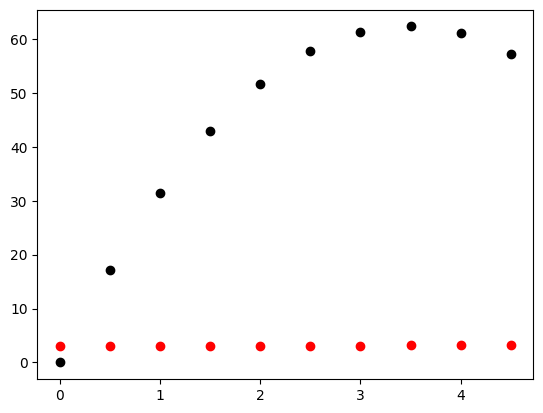

In [168]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.scatter(range(x.shape[0]),x.detach(),color = "blue")
ax1.scatter(x.detach(), y.detach(), color="red")
ax1.scatter(x.detach(), y_true.detach(), color="black")

In [185]:
for i in tqdm(range(10000)):
  y = a * x**2 + b * x + c
  loss = torch.mean((y - y_true) ** 2)
  for p in paramters:
    p.grad = None
  loss.backward()
  for p in paramters:
    p.data -= p.grad * 0.001
pass
loss.item()

100%|██████████| 10000/10000 [00:01<00:00, 8938.50it/s]


0.21320465207099915

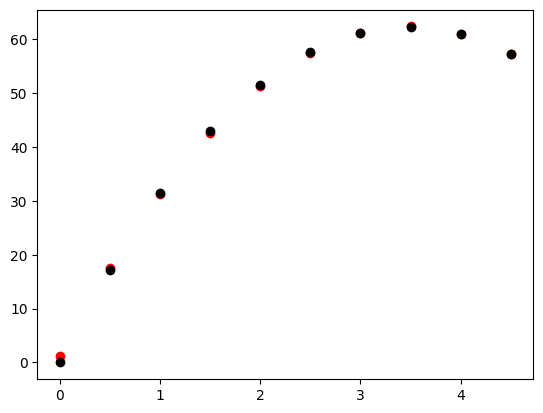

In [186]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.scatter(range(x.shape[0]),x.detach(),color = "blue")
ax1.scatter(x.detach(), y.detach(), color="red")
ax1.scatter(x.detach(), y_true.detach(), color="black")

In [187]:
a, b, c

(tensor(-5.0206, requires_grad=True),
 tensor(35.0307, requires_grad=True),
 tensor(1.2905, requires_grad=True))